In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

In [2]:
stock_df = pd.read_csv("NSE-TATAGLOBAL.csv")
stock_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
stock_df.shape


(2035, 8)

In [4]:
stock_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:
stock_df.describe()



,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [6]:
stock_df.isnull().sum()



Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
stock_df.columns


Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

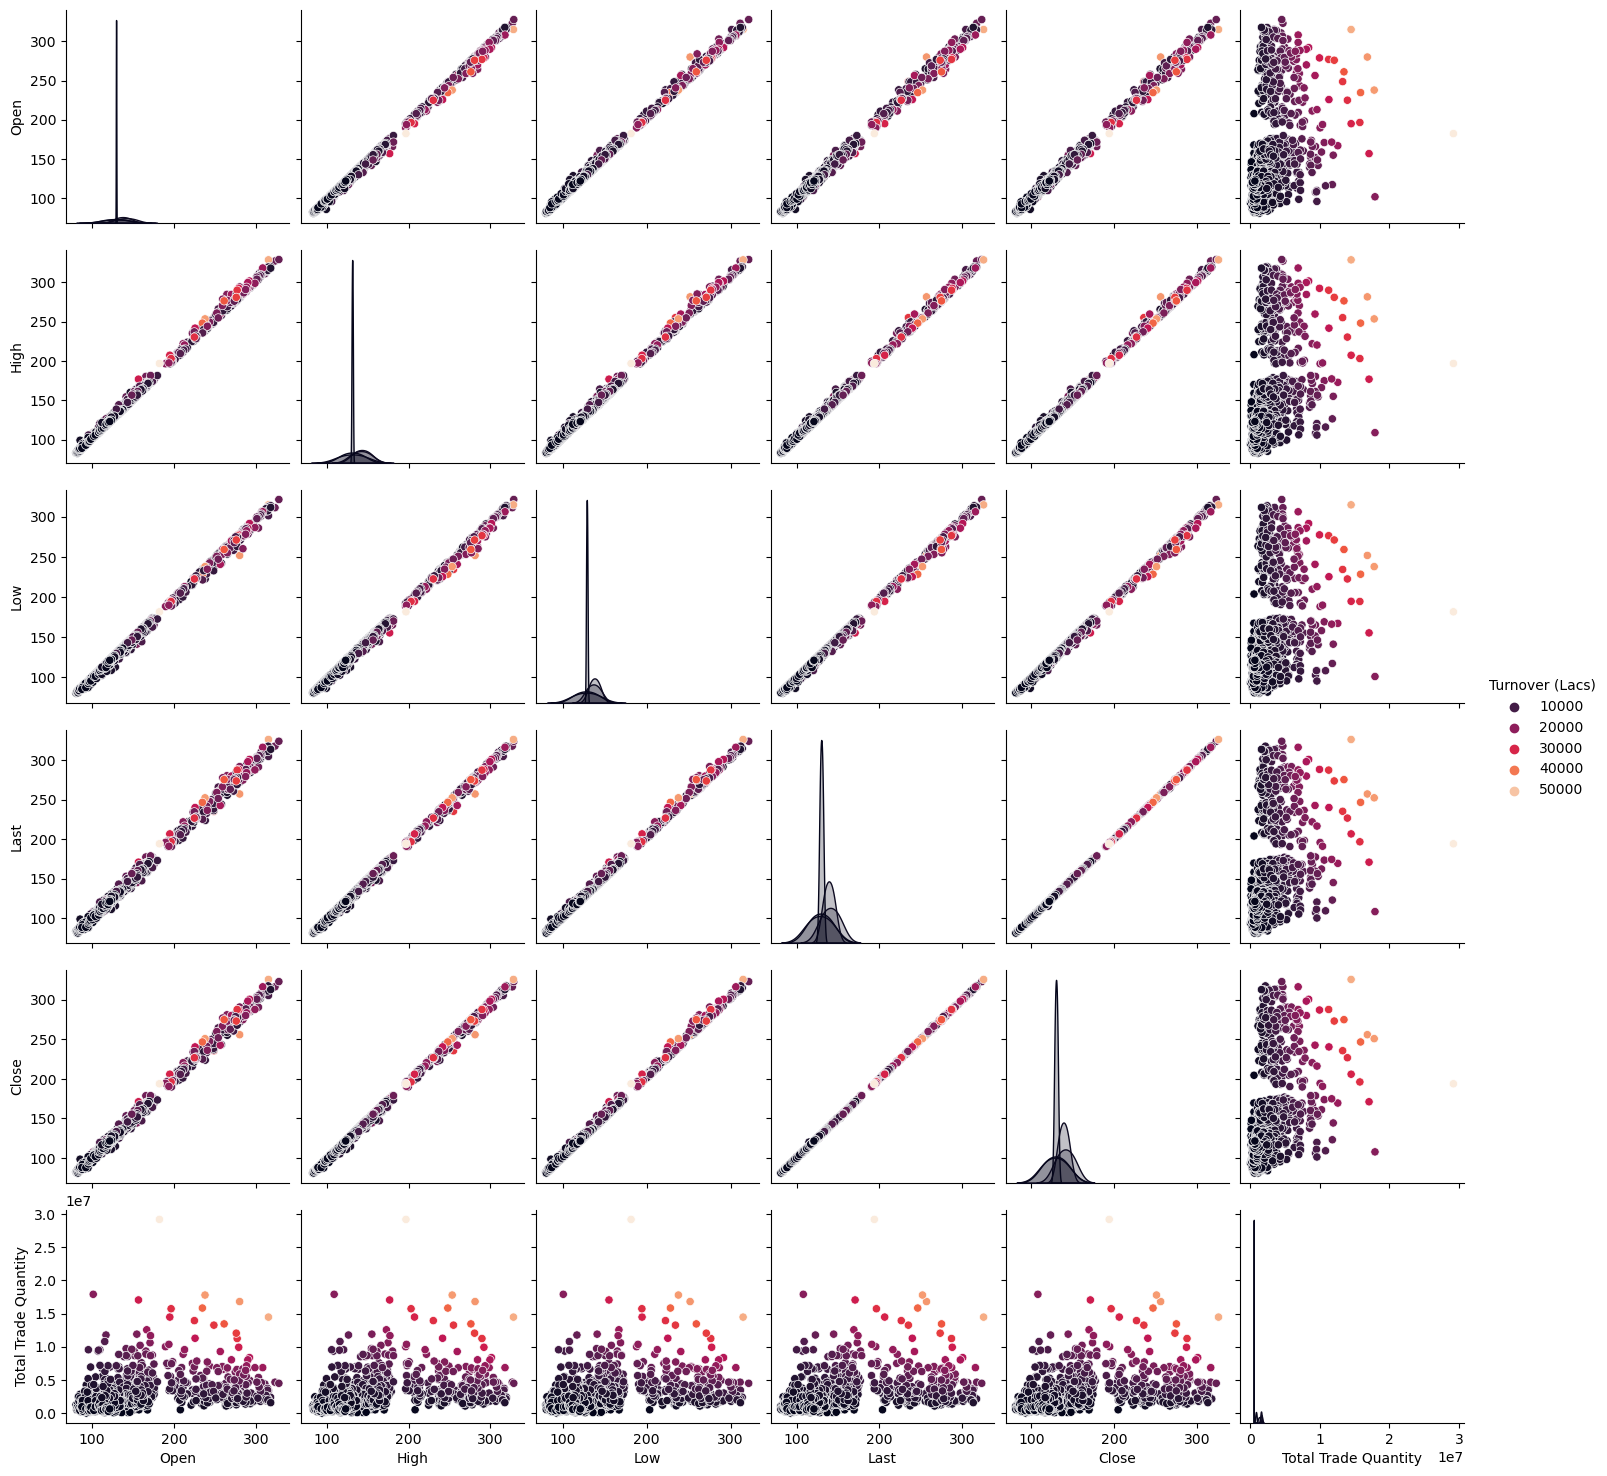

In [8]:
sns.pairplot(stock_df, hue= 'Turnover (Lacs)', palette= "rocket")
plt.show()

In [9]:
df_close=stock_df.reset_index()['Close']
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

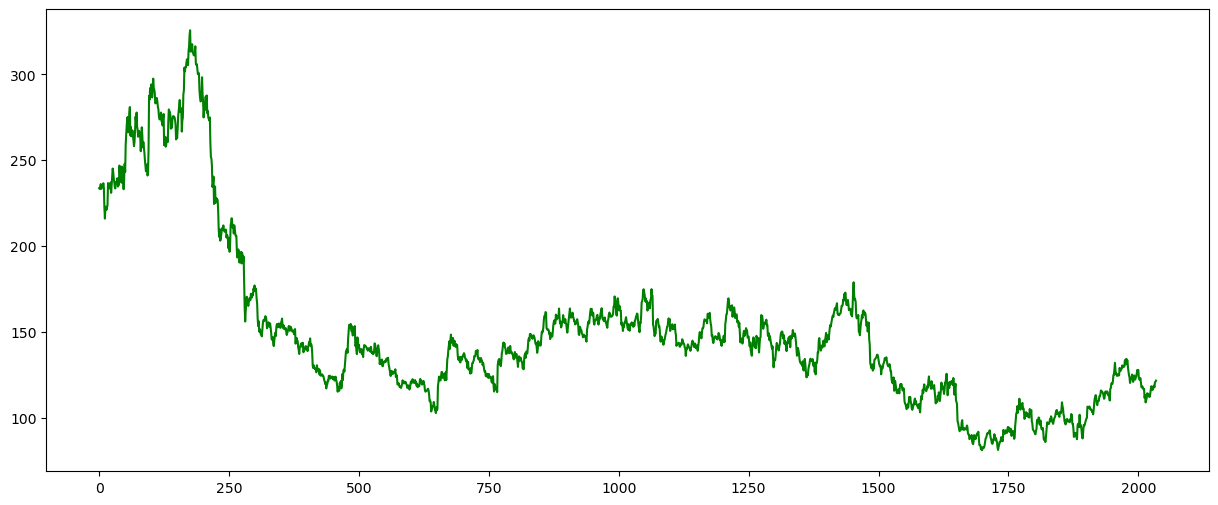

In [10]:
plt.figure(figsize=(15,6))
plt.plot(df_close, c= "g")
plt.show()

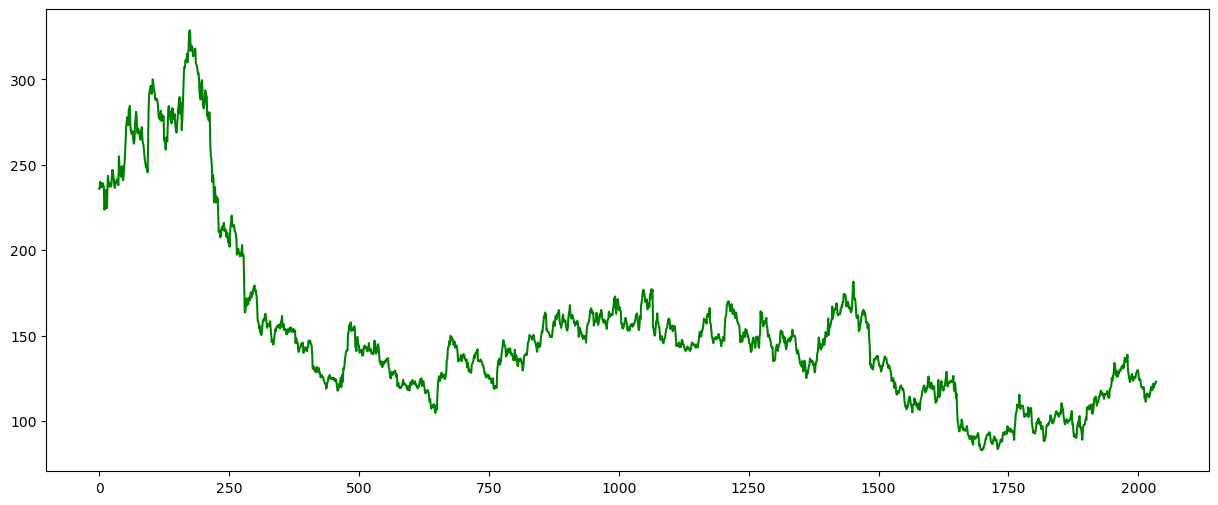

In [11]:
plt.figure(figsize=(15,6))

df_high=stock_df.reset_index()['High']
plt.plot(df_high, c="g")
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [13]:
df_high.shape


(2035, 1)

In [14]:
print(df_high)


[[0.62268754]
 [0.62614353]
 [0.6391543 ]
 ...
 [0.15917869]
 [0.15938199]
 [0.16344786]]


In [18]:
training_size = int(len(df_high) * 0.75)
test_size = len(df_high) - training_size
train_data, test_data = df_high[0:training_size,:], df_high[training_size:len(df_high),:1]


In [19]:
training_size,test_size


(1526, 509)

# DATA PREPROCESSING 

In [20]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)


In [21]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

# LSTM

In [22]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [23]:
print(x_train.shape), print(y_train.shape)


(1425, 100, 1)
(1425,)


(None, None)

In [24]:
print(x_test.shape), print(y_test.shape)


(408, 100, 1)
(408,)


(None, None)

# Import required modules for the stacked LSTM.


In [25]:
import math
from sklearn.metrics import mean_squared_error



In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
pip install tensorflow

In [ ]:
pip install --upgrade tensorflow


In [ ]:
!pip install --upgrade python




In [ ]:
pip install --upgrade pip


In [27]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))

model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [28]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)



Epoch 1/100
23/23 [==============================] - 17s 275ms/step - loss: 0.0258 - val_loss: 0.0063
Epoch 2/100
23/23 [==============================] - 4s 155ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 3/100
23/23 [==============================] - 4s 169ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4/100
23/23 [==============================] - 4s 161ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 5/100
23/23 [==============================] - 4s 155ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 6/100
23/23 [==============================] - 4s 156ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 7/100
23/23 [==============================] - 4s 180ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/100
23/23 [==============================] - 5s 200ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/100
23/23 [==============================] - 4s 196ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 10/100
23/23 [==============================] - 5s 204ms/step - loss: 9.7702e-04 - v

23/23 [==============================] - 5s 203ms/step - loss: 1.9944e-04 - val_loss: 2.1438e-04
Epoch 77/100
23/23 [==============================] - 4s 196ms/step - loss: 1.9006e-04 - val_loss: 2.1365e-04
Epoch 78/100
23/23 [==============================] - 5s 198ms/step - loss: 1.8616e-04 - val_loss: 2.5048e-04
Epoch 79/100
23/23 [==============================] - 4s 185ms/step - loss: 1.8626e-04 - val_loss: 1.7348e-04
Epoch 80/100
23/23 [==============================] - 4s 194ms/step - loss: 1.9360e-04 - val_loss: 2.1478e-04
Epoch 81/100
23/23 [==============================] - 4s 187ms/step - loss: 1.8890e-04 - val_loss: 2.6357e-04
Epoch 82/100
23/23 [==============================] - 5s 198ms/step - loss: 2.2851e-04 - val_loss: 1.9343e-04
Epoch 83/100
23/23 [==============================] - 5s 222ms/step - loss: 1.9202e-04 - val_loss: 2.8112e-04
Epoch 84/100
23/23 [==============================] - 4s 183ms/step - loss: 1.9277e-04 - val_loss: 2.5704e-04
Epoch 85/100
23/23 [===

In [32]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

13/13 [==============================] - 0s 27ms/step


In [33]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [34]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))


164.35780296640957

In [35]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

107.75036427756514

In [36]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_high) - 1, :] = test_predict

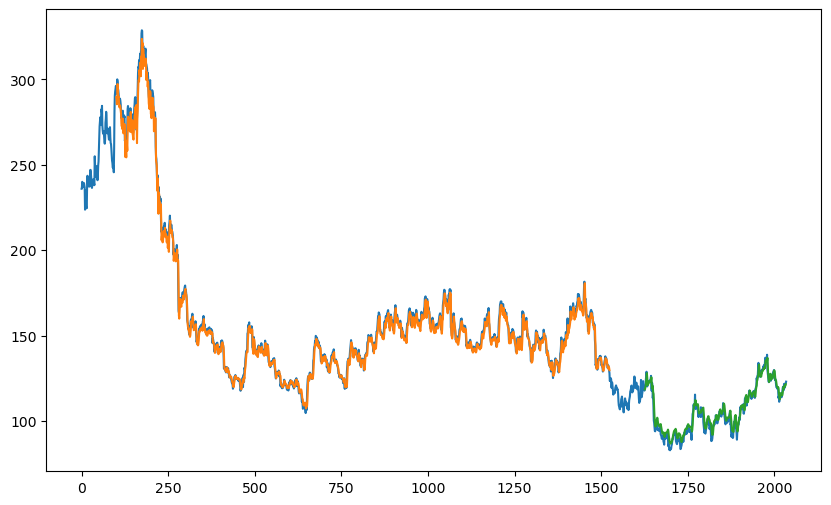

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [37]:
#Plot baseline and predictions
plt.figure(figsize=(10,6))

plt.plot(scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")

In [38]:
#Predict the next 28 days Stock Price
len(test_data), x_test.shape

(509, (408, 100, 1))

In [39]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

# Predicting values for next 30 days


In [40]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16236608]
101
1 day input [0.13254727 0.13397032 0.13356373 0.13498679 0.14108559 0.13498679
 0.12644847 0.12685505 0.12482212 0.14515145 0.1467778  0.15003049
 0.15368977 0.17198618 0.16548079 0.17625534 0.17564546 0.19129904
 0.20817239 0.20309006 0.18479366 0.17930474 0.1896727  0.17483228
 0.17849156 0.17645863 0.18540354 0.18377719 0.19190892 0.18987599
 0.19028258 0.19394186 0.20004066 0.19638138 0.19495832 0.20349665
 0.19597479 0.21162838 0.22036999 0.20979874 0.21528766 0.21589754
 0.21610083 0.22748526 0.19150234 0.1833706  0.17340923 0.16751372
 0.1622281  0.17056312 0.17462899 0.17930474 0.18174426 0.16853019
 0.16548079 0.1742224  0.1713763  0.17300264 0.17157959 0.17767839
 0.18459036 0.18702988 0.18987599 0.19109575 0.18581012 0.17015654
 0.16751372 0.16974995 0.16609067 0.15531612 0.15003049 0.15064037
 0.14860744 0.14596463 0.15043708 0.14413499 0.12441553 0.12827811
 0.11547062 0.12034966 0.13478349 0.13498679 0.12868469 0.13295385
 0.12807481 0.12624517 0.13051433

10 day output [[0.16355388]]
11 day input [0.1467778  0.15003049 0.15368977 0.17198618 0.16548079 0.17625534
 0.17564546 0.19129904 0.20817239 0.20309006 0.18479366 0.17930474
 0.1896727  0.17483228 0.17849156 0.17645863 0.18540354 0.18377719
 0.19190892 0.18987599 0.19028258 0.19394186 0.20004066 0.19638138
 0.19495832 0.20349665 0.19597479 0.21162838 0.22036999 0.20979874
 0.21528766 0.21589754 0.21610083 0.22748526 0.19150234 0.1833706
 0.17340923 0.16751372 0.1622281  0.17056312 0.17462899 0.17930474
 0.18174426 0.16853019 0.16548079 0.1742224  0.1713763  0.17300264
 0.17157959 0.17767839 0.18459036 0.18702988 0.18987599 0.19109575
 0.18581012 0.17015654 0.16751372 0.16974995 0.16609067 0.15531612
 0.15003049 0.15064037 0.14860744 0.14596463 0.15043708 0.14413499
 0.12441553 0.12827811 0.11547062 0.12034966 0.13478349 0.13498679
 0.12868469 0.13295385 0.12807481 0.12624517 0.13051433 0.13905265
 0.14718439 0.15104696 0.14515145 0.14311852 0.15816223 0.15328319
 0.14921732 0.1553161

19 day output [[0.16398309]]
20 day input [0.20309006 0.18479366 0.17930474 0.1896727  0.17483228 0.17849156
 0.17645863 0.18540354 0.18377719 0.19190892 0.18987599 0.19028258
 0.19394186 0.20004066 0.19638138 0.19495832 0.20349665 0.19597479
 0.21162838 0.22036999 0.20979874 0.21528766 0.21589754 0.21610083
 0.22748526 0.19150234 0.1833706  0.17340923 0.16751372 0.1622281
 0.17056312 0.17462899 0.17930474 0.18174426 0.16853019 0.16548079
 0.1742224  0.1713763  0.17300264 0.17157959 0.17767839 0.18459036
 0.18702988 0.18987599 0.19109575 0.18581012 0.17015654 0.16751372
 0.16974995 0.16609067 0.15531612 0.15003049 0.15064037 0.14860744
 0.14596463 0.15043708 0.14413499 0.12441553 0.12827811 0.11547062
 0.12034966 0.13478349 0.13498679 0.12868469 0.13295385 0.12807481
 0.12624517 0.13051433 0.13905265 0.14718439 0.15104696 0.14515145
 0.14311852 0.15816223 0.15328319 0.14921732 0.15531612 0.15917869
 0.15938199 0.16344786 0.16236608 0.16326748 0.16357155 0.16368152
 0.16369444 0.1636594

In [41]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [42]:
day_new.shape


(100,)

In [43]:
day_pred.shape


(28,)

In [44]:
ds3 = df_high.tolist()
ds3.extend(lst_output)

len(df_high)

2035

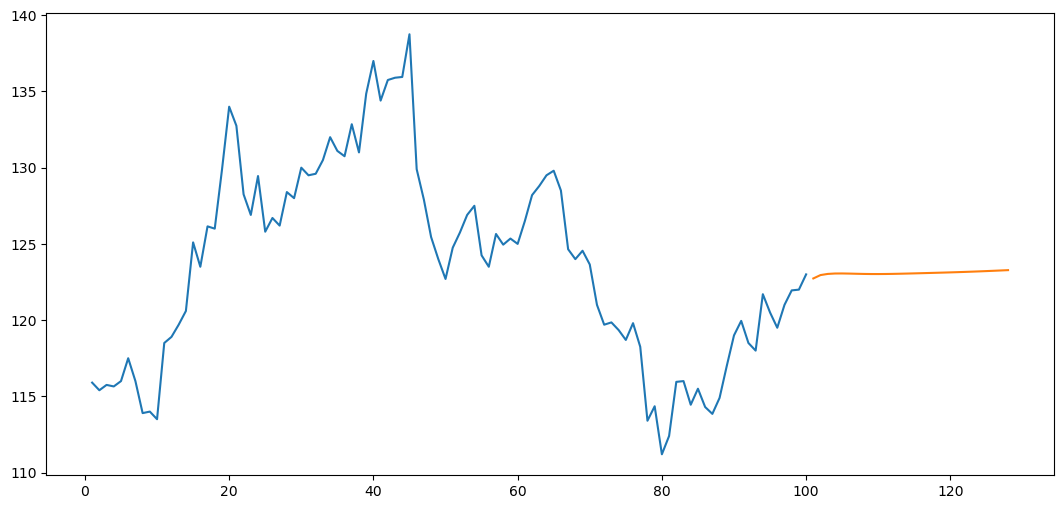

In [45]:
plt.figure(figsize=(13,6))

plt.plot(day_new, scaler.inverse_transform(df_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

plt.show()

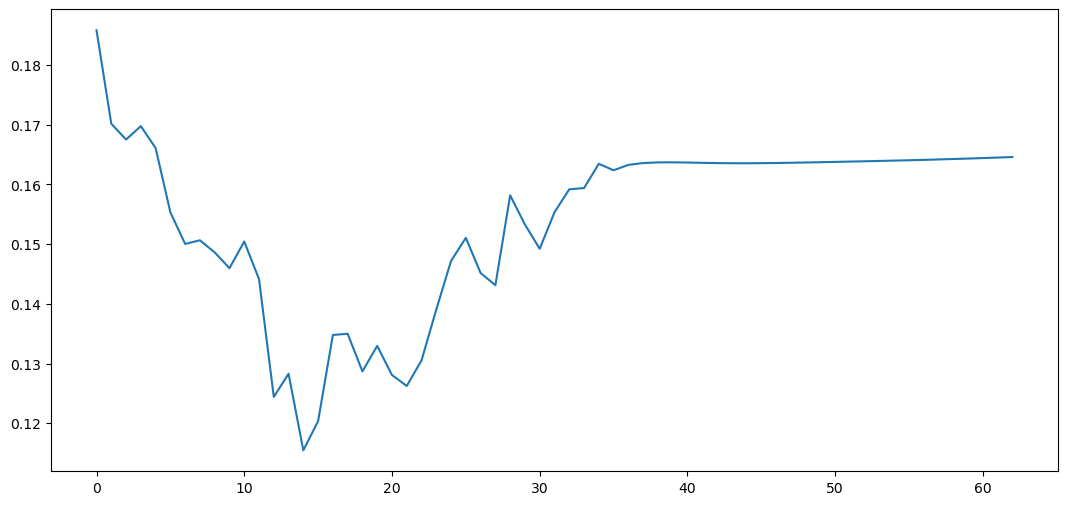

In [46]:
plt.figure(figsize=(13,6))

ds3=df_high.tolist()
ds3.extend(lst_output)
plt.plot(ds3[2000:])
plt.show()

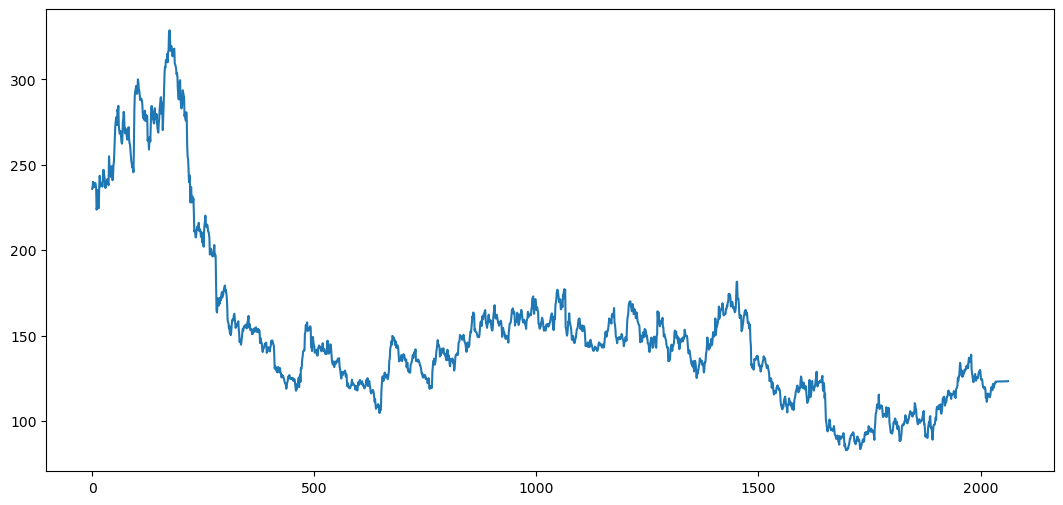

In [47]:
plt.figure(figsize=(13,6))

ds3=scaler.inverse_transform(ds3).tolist()
plt.plot(ds3)

plt.show()